In [9]:
from fastai.imports import *
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [10]:
train_raw = pd.read_csv('intermediate_data/raw_train.csv')
test_raw = pd.read_csv('intermediate_data/raw_test.csv')

In [11]:
x_trn3 = train_raw.drop(['stroke', 'age_bins'], axis=1)
y_trn3 = train_raw['stroke'].values

In [4]:
# cols = ['heart_disease', 'id', 'bmi', 'avg_glucose_level', 'age']
# x_trn3 = x_trn3[cols]

In [12]:
x_trn3.shape, y_trn3.shape

((43400, 11), (43400,))

In [6]:
def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

### 1. Num leaves

In [6]:
lg = lgb.LGBMClassifier(silent=False)

# # alvira
# param_dist = {"max_depth": [25,50, 75],
#               "learning_rate" : [0.01,0.05,0.1],
#               "num_leaves": [300,900,1200],
#               "n_estimators": [100]
#              }

# neerja
param_dist = { 'learning_rate':[0.05],
          'num_leaves':[10,15,20,300,900,1200],
#           'max_depth':[5,10,15,20],
           'n_estimators':[100],
         }

# grid_search = GridSearchCV(lg, n_jobs=-1, 
#                            param_grid=param_dist,
#                            cv = 5,
#                            scoring="roc_auc", 
#                            verbose=5)

grid_search = GridSearchCV(lg,
                           n_jobs=-1,
                           param_grid=param_dist, 
                           scoring='roc_auc',
                           verbose=20,
                           cv = StratifiedKFold(n_splits=5, 
                                   shuffle=True,
                                   random_state=1).split(x_trn3,y_trn3)) 

grid_search.fit(x_trn3,y_trn3)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] learning_rate=0.05, n_estimators=100, num_leaves=10 .............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=10 .............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=10 .............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=10 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=10, score=0.8498484057002744, total=   1.1s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=10 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=10, score=0.8587782865614362, total=   1.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=15 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=10, score=0.8394439678748951, total=   1.2s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=10, score=0.87347283519406, total=   1.3s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=15 .............
[CV] learning_rate=0.05, n_estimators=100, num_le

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=10, score=0.8685401041525647, total=   0.9s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=15 .............


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=15, score=0.8591649804075119, total=   1.2s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=15, score=0.8392440826501119, total=   1.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=15 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=15, score=0.8497422859538558, total=   1.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=20 .............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=20 .............


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.1s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=15, score=0.8718482717954736, total=   1.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=20 .............


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.3s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=15, score=0.8657080238389637, total=   1.3s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=20 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=20, score=0.8556245834167746, total=   1.4s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=20, score=0.8375314212101015, total=   1.4s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=20 .............


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.8s


[CV] learning_rate=0.05, n_estimators=100, num_leaves=300 ............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=20, score=0.8474323131638556, total=   1.5s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=300 ............


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.1s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=20, score=0.8695674900796335, total=   1.3s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=300 ............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=20, score=0.8624359576049123, total=   1.5s


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    6.6s


[CV] learning_rate=0.05, n_estimators=100, num_leaves=300 ............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=300, score=0.8231486518395419, total=  11.4s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=300 ............


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.1s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=300, score=0.8073184892712073, total=  11.7s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=300, score=0.8081242886427209, total=  11.4s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=900 ............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=300, score=0.8158704049675538, total=  11.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=900 ............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=900 ............


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:   18.6s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=300, score=0.8377790714115951, total=  11.8s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=900 ............


[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:   29.4s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=900, score=0.8033454435135563, total=  27.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=900 ............


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   47.2s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=900, score=0.7869201433961757, total=  29.7s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=1200 ...........


[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:   49.8s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=900, score=0.8033062137030849, total=  30.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=1200 ...........


[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:   50.0s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=900, score=0.802110503404062, total=  28.4s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=1200 ...........
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=900, score=0.8265801135389308, total=  28.1s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=1200 ...........


[Parallel(n_jobs=-1)]: Done  25 out of  30 | elapsed:  1.3min remaining:   15.3s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=1200, score=0.8014239300349407, total=  32.6s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=1200 ...........
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=1200, score=0.8031765685199079, total=  36.5s


[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.5min remaining:    9.7s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=1200, score=0.7869201433961757, total=  32.6s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=1200, score=0.8020619921359098, total=  31.0s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=1200, score=0.826619975511211, total=  29.2s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=10, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [7]:
grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85802, std: 0.01234, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 10},
  mean: 0.85714, std: 0.01157, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 15},
  mean: 0.85452, std: 0.01122, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 20},
  mean: 0.81845, std: 0.01125, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 300},
  mean: 0.80445, std: 0.01269, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 900},
  mean: 0.80404, std: 0.01276, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 1200}],
 {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 10},
 0.8580157108946895)

In [7]:
lg = lgb.LGBMClassifier(silent=False)

# neerja
param_dist = { 'learning_rate':[0.05],
          'num_leaves':[5,7,9,11,13],
          'n_estimators':[100],
         }

grid_search = GridSearchCV(lg,
                           n_jobs=-1,
                           param_grid=param_dist, 
                           scoring='roc_auc',
                           verbose=20,
                           cv = StratifiedKFold(n_splits=5, 
                                   shuffle=True,
                                   random_state=1).split(x_trn3,y_trn3)) 

grid_search.fit(x_trn3,y_trn3)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] learning_rate=0.05, n_estimators=100, num_leaves=5 ..............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=5 ..............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=5 ..............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=5 ..............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=5, score=0.8388129283521685, total=   1.1s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=5, score=0.8587850116718028, total=   1.2s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=5, score=0.8666530534270765, total=   1.0s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=5, score=0.8487561943665362, total=   1.1s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=5 ..............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=7 ..............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=7 ..............
[CV] learning_rate=0.05, n_estimators=100, num_leav

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=5, score=0.8646922956585048, total=   1.0s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=7 ..............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=7, score=0.8402076415187392, total=   1.1s


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.0s


[CV] learning_rate=0.05, n_estimators=100, num_leaves=7 ..............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=7, score=0.8500247737295336, total=   1.2s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=7, score=0.8609441457167025, total=   1.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=9 ..............
[CV] learning_rate=0.05, n_estimators=100, num_leaves=9 ..............


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.1s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=7, score=0.8695584647274193, total=   1.1s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=9 ..............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=7, score=0.8645851196009591, total=   1.2s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=9 ..............


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=9, score=0.8600661451966274, total=   1.3s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=9 ..............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=9, score=0.8389952535665502, total=   1.3s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=11 .............


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.9s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=9, score=0.8506783069565977, total=   1.3s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=11 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=9, score=0.8729023577228435, total=   1.4s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=11 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=9, score=0.8678951675255794, total=   1.4s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=11 .............


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    6.6s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=11, score=0.8596985058299237, total=   1.6s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=11 .............


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=11, score=0.8390486808322397, total=   1.3s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=13 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=11, score=0.8722213196870008, total=   1.4s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=13 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=11, score=0.8501208046268209, total=   1.6s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=13 .............


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    8.5s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=11, score=0.8664887168055067, total=   1.5s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=13 .............


[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    8.8s remaining:    2.2s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=13, score=0.8587106618405282, total=   1.4s
[CV] learning_rate=0.05, n_estimators=100, num_leaves=13 .............
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=13, score=0.8504858715009442, total=   1.4s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=13, score=0.838294721236703, total=   1.5s
[CV]  learning_rate=0.05, n_estimators=100, num_leaves=13, score=0.872574436592388, total=   1.5s


[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:   10.3s remaining:    1.4s


[CV]  learning_rate=0.05, n_estimators=100, num_leaves=13, score=0.8666620787792911, total=   1.1s


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.5s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x1c24ee9ca8>,
       error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.05], 'num_leaves': [5, 7, 9, 11, 13], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=20)

In [8]:
grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85554, std: 0.01043, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 5},
  mean: 0.85706, std: 0.01060, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 7},
  mean: 0.85811, std: 0.01216, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 9},
  mean: 0.85751, std: 0.01181, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 11},
  mean: 0.85734, std: 0.01209, params: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 13}],
 {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 9},
 0.8581064845317391)

In [7]:
lg3 = lgb.LGBMClassifier(silent=False)

# # alvira
param_dist = {"max_depth": [4,5,6,7,8,9,10],
              "learning_rate" : [0.05],
              "num_leaves": [9],
              "n_estimators": [100]
             }

grid_search = GridSearchCV(lg3,
                           n_jobs=-1,
                           param_grid=param_dist, 
                           scoring='roc_auc',
                           verbose=20,
                           cv = StratifiedKFold(n_splits=5, 
                                   shuffle=True,
                                   random_state=1).split(x_trn3,y_trn3)) 

grid_search.fit(x_trn3,y_trn3)
grid_search.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9, score=0.8578565728239784, total=   0.8s
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9, score=0.8377096366348146, total=   0.8s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s


[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9, score=0.8490633437734237, total=   1.1s
[CV] learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9, score=0.8634979407154698, total=   0.9s
[CV] learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s


[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=9, score=0.8620309449242922, total=   0.9s
[CV] learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9, score=0.861266203779811, total=   0.9s
[CV] learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.4s


[CV]  learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9, score=0.8490394294643718, total=   0.8s
[CV]  learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9, score=0.8377937005143963, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s


[CV]  learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9, score=0.8669350956837757, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=9, score=0.8627337942279865, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s


[CV]  learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9, score=0.8608201047921641, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9, score=0.8389821769630598, total=   1.1s
[CV] learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.0s


[CV]  learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9, score=0.8498200074582752, total=   1.0s
[CV]  learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9, score=0.8709115154468903, total=   1.0s
[CV] learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.9s


[CV]  learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=9, score=0.8637295914223053, total=   0.9s
[CV]  learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9, score=0.8608548511957247, total=   0.9s
[CV] learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.2s


[CV]  learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9, score=0.8391618868567432, total=   1.0s
[CV] learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9, score=0.850432437966656, total=   0.9s
[CV] learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.3s


[CV]  learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9, score=0.8726488957481565, total=   1.0s
[CV] learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=9, score=0.8656373252466179, total=   1.1s
[CV] learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    6.5s


[CV]  learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9, score=0.8600661451966274, total=   0.9s
[CV] learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9, score=0.8389952535665502, total=   0.9s
[CV] learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9, score=0.8506783069565977, total=   0.9s
[CV] learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    7.6s


[CV]  learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9, score=0.8729023577228435, total=   0.9s
[CV] learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.7s


[CV]  learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=9, score=0.8678951675255794, total=   0.8s
[CV] learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9 .
[CV]  learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9, score=0.8600661451966274, total=   0.8s
[CV] learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.7s


[CV]  learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9, score=0.8389952535665502, total=   0.9s
[CV] learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9 
[CV]  learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9, score=0.8506783069565977, total=   1.0s
[CV] learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9 


[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.9s


[CV]  learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9, score=0.8729023577228435, total=   1.1s
[CV]  learning_rate=0.05, max_depth=9, n_estimators=100, num_leaves=9, score=0.8678951675255794, total=   0.9s
[CV] learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9 
[CV] learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9 
[CV]  learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9, score=0.8600661451966274, total=   0.9s


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    9.8s remaining:    1.6s


[CV] learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9 
[CV]  learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9, score=0.8389952535665502, total=   0.9s


[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   10.1s remaining:    0.9s


[CV]  learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9, score=0.8506783069565977, total=   0.7s
[CV]  learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9, score=0.8729023577228435, total=   0.8s
[CV]  learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=9, score=0.8678951675255794, total=   0.8s


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   10.9s finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=8, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=9, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [8]:
grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85403, std: 0.00958, params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 9},
  mean: 0.85555, std: 0.01069, params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 9},
  mean: 0.85685, std: 0.01122, params: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'num_leaves': 9},
  mean: 0.85775, std: 0.01177, params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 9},
  mean: 0.85811, std: 0.01216, params: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'num_leaves': 9},
  mean: 0.85811, std: 0.01216, params: {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 100, 'num_leaves': 9},
  mean: 0.85811, std: 0.01216, params: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 9}],
 {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'num_leaves': 9},
 0.8581064845317391)

In [7]:
lg = lgb.LGBMClassifier(silent=False)

param_dist = { 'learning_rate':[0.01, 0.05, 0.1],
          'num_leaves':[9],
          'max_depth':[8],
          'n_estimators':[200],
         }

grid_search = GridSearchCV(lg,
                           n_jobs=-1,
                           param_grid=param_dist, 
                           scoring='roc_auc',
                           verbose=20,
                           cv = StratifiedKFold(n_splits=5, 
                                   shuffle=True,
                                   random_state=1).split(x_trn3,y_trn3)) 

grid_search.fit(x_trn3,y_trn3)
grid_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9 .
[CV] learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9 .
[CV] learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9 .
[CV] learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9 .
[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9, score=0.8534359336097105, total=   1.5s
[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9, score=0.8232924944779372, total=   1.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9, score=0.8390058821727047, total=   1.8s
[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9, score=0.852728815242015, total=   1.7s
[CV] learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=9, score=0.8508331152206549, total=   1.5s
[CV]  learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9, score=0.8603769947424582, total=   1.5s
[CV] learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9 .
[CV] learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9 .


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.1s


[CV]  learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9, score=0.8372766142506582, total=   1.6s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9 ..
[CV]  learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9, score=0.8503868513150254, total=   1.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9 ..


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.4s


[CV]  learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9, score=0.86804634217517, total=   1.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9 ..
[CV]  learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=9, score=0.8759318676161336, total=   1.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9 ..
[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9, score=0.8581932019595477, total=   1.7s
[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9, score=0.8335116732971273, total=   1.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9 ..


[Parallel(n_jobs=-1)]: Done   9 out of  15 | elapsed:    6.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    6.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  11 out of  15 | elapsed:    6.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    6.6s remaining:    1.7s


[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9, score=0.8415404252711471, total=   1.2s
[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9, score=0.8663883097621218, total=   1.2s
[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, num_leaves=9, score=0.8615450801300855, total=   1.5s


[Parallel(n_jobs=-1)]: Done  13 out of  15 | elapsed:    8.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.4s finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=8, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
        n_jobs=-1, num_leaves=9, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [8]:
grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84386, std: 0.01154, params: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200, 'num_leaves': 9},
  mean: 0.85840, std: 0.01353, params: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'num_leaves': 9},
  mean: 0.85223, std: 0.01255, params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'num_leaves': 9}],
 {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'num_leaves': 9},
 0.8584026666327739)

In [14]:
grid_search.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=8, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
        n_jobs=-1, num_leaves=9, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

### Final Model

In [19]:
m = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=8, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
        n_jobs=-1, num_leaves=9, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [23]:
x_trn3.shape

(43400, 11)

In [20]:
m.fit(x_trn3, y_trn3)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=8, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=200,
        n_jobs=-1, num_leaves=9, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [21]:
x_trn3[:1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,-1


In [24]:
preds = m.predict_proba(test_raw.drop('age_bins',1))[:,1]

(array([16089.,  1744.,   531.,   140.,    54.,    21.,    11.,     7.,     2.,     2.]),
 array([0.00009, 0.04165, 0.08321, 0.12477, 0.16632, 0.20788, 0.24944, 0.29099, 0.33255, 0.37411, 0.41567]),
 <a list of 10 Patch objects>)

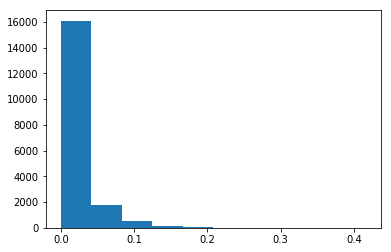

In [25]:
plt.hist(preds)

In [26]:
preds.mean()

0.01770876150439421

In [27]:
pred_df = pd.DataFrame(test_raw.id)
pred_df['stroke'] = preds
pred_df.to_csv('submissions/lgm_tuned.csv', index=False)

In [12]:
d_train = lgb.Dataset(x_trn3, label=y_trn3)
params = {"max_depth": 50, "learning_rate" : 0.05, "num_leaves": 1200,  "n_estimators": 200, "is_unbalance":True}

# Without Categorical Features
model2 = lgb.train(params, d_train)
#auc2(model2, x_trn3, test)

# #With Catgeorical Features
# cate_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE","DESTINATION_AIRPORT",
#                  "ORIGIN_AIRPORT"]
# model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)
# auc2(model2, train, test)

SyntaxError: invalid syntax (<ipython-input-12-17059f56e410>, line 2)